In [2]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
#importing the tumor dataset
dataset = pd.read_csv('tumor.csv')

In [4]:
dataset.head(15)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [5]:
dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
# dataset['Species'].unique()

In [7]:
C=dataset.iloc[:,1:8].values
print(C)

[[ 5  1  1 ...  2  1  3]
 [ 5  4  4 ...  7 10  3]
 [ 3  1  1 ...  2  2  3]
 ...
 [ 5 10 10 ...  7  3  8]
 [ 4  8  6 ...  3  4 10]
 [ 4  8  8 ...  4  5 10]]


In [8]:
#finding the optimum number of clusters for k-means algorithm 

acss=[] #with in cluster sum of square error
for i in range(1,11):
    kmeans =KMeans(n_clusters = i, init = 'k-means++', max_iter=200, n_init=10,random_state=0)
    kmeans.fit(C)
    acss.append(kmeans.inertia_)

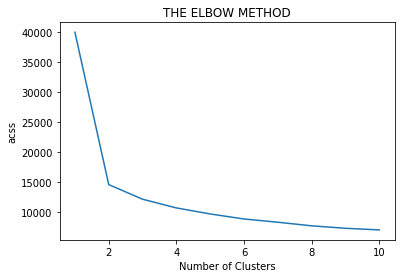

In [9]:
#ploting the results onto a line graph
#Elbow method
plt.plot(range(1,11),acss)
plt.title('THE ELBOW METHOD')
plt.xlabel('Number of Clusters')
plt.ylabel('acss')
plt.show()

In [10]:
#applying k-means algorithm to tumor data set
kmeans =KMeans(n_clusters = 3, init = 'k-means++', max_iter=200, n_init = 10,random_state = 0)
y_kmeans = kmeans.fit_predict(C)

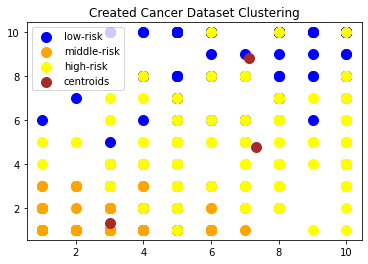

In [11]:
#Visualising the clusters with Scatter plot
plt.scatter(C[y_kmeans == 0,0],C[y_kmeans == 0,1], s = 100, c = 'blue', label = 'low-risk')
plt.scatter(C[y_kmeans == 1,0],C[y_kmeans == 1,1], s = 100, c = 'orange', label = 'middle-risk')
plt.scatter(C[y_kmeans == 2,0],C[y_kmeans == 2,1], s = 100, c = 'yellow', label = 'high-risk')

#plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c= 'brown', label = 'centroids')
plt.title('Created Cancer Dataset Clustering')

plt.legend()